In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [61]:
!pip3 -q install ipympl

In [62]:
from google.colab import output
output.enable_custom_widget_manager()

In [63]:
%matplotlib widget

# TUTORIAL 4: Surfaces


## Weingarten endomorphism, principal curvatures and principal directions.
Let $f:U\subset \mathbb{R}^2 \to \mathbb{R}^3$ be a regular parameterized surface of class $C^2$. We recall that at the point $m_0=f(x_0,y_0)$, the two vectors $\mathcal{B}_{m_0}:=\left(\frac{\partial f}{\partial x}(x_0,y_0),\frac{\partial f}{\partial y}(x_0,y_0)\right)$ form a basis of the tangent space.

$\bullet$ The matrix of the first fundamental form in the basis $\mathcal{B}_{m_0}$ is given by
$$
I_{m_0}=\left(\begin{array}{cc}
E_{m_0}&F_{m_0}\\
F_{m_0}&G_{m_0}\\
\end{array}
\right)
$$
with
$$
\quad E_{m_0}=\left\| \frac{\partial f}{\partial x}(x_0,y_0)\right\|^2\quad
F_{m_0}= \left\langle \frac{\partial f}{\partial x}(x_0,y_0),\frac{\partial f}{\partial y}(x_0,y_0)\right\rangle\quad
G_{m_0}=\left\| \frac{\partial f}{\partial y}(x_0,y_0)\right\|^2
$$

$\bullet$ The matrix of the second fundamental form is given by
$$
II_{m_0}=\left(\begin{array}{cc}
L_{m_0}&M_{m_0}\\
M_{m_0}&N_{m_0}\\
\end{array}
\right)
$$
with
$$
\quad L_{m_0}= \left \langle \frac{\partial^2 f}{\partial x^2}(x_0,y_0),K(x_0,y_0) \right \rangle\quad
M_{m_0}= \left \langle \frac{\partial^2 f}{\partial x\partial y}(x_0,y_0),K(x_0,y_0)\right\rangle\quad
N_{m_0}= \left\langle \frac{\partial^2 f}{\partial y^2}(x_0,y_0),K(x_0,y_0)\right\rangle\quad
$$
where $K(x_0,y_0)=\frac{\frac{\partial f}{\partial x}(x_0,y_0)\wedge\frac{\partial f}{\partial y}(x_0,y_0)}{\left\|\frac{\partial f}{\partial x}(x_0,y_0)\wedge\frac{\partial f}{\partial y}(x_0,y_0)\right\|}$.

$\bullet$ The matrix of the Weingarten endomorphism at $m_0$ in the basis $\mathcal{B}_{m_0}$ is given by
$$
A_{m_0}= I_{m_0}^{-1} II_{m_0}
$$
The eigenvalues $\lambda_1$ and $\lambda_2$ of $A_{m_0}$ are called the principal curvatures.

The eigenvectors $\vec{e_1}$ and $\vec{e_2}$ of $A_{m_0}$ are called the principal directions.


# PART 1. Numerical computation of principal directions
We want to compute a function that numerically compute the principal vectors and principal directions of a paramatrized surface $f:U\to \mathbb{R}^2$ at a point $f(x_0,y_0)$. Namely, we want to define a function whose signature can for instance be
$$
\textbf{def principal}(f, x_0, y_0, h=0.001):
$$

In [64]:
def principal(f, u_0, v_0, h=0.001):
  # Compute the first derivatives of f with respect to u and v using a central difference scheme
  df_du = (-f(u_0 + 2*h, v_0) + 8*f(u_0 + h, v_0) - 8*f(u_0 - h, v_0) + f(u_0 - 2*h, v_0)) / (12 * h)
  df_dv = (-f(u_0, v_0 + 2*h) + 8*f(u_0, v_0 + h) - 8*f(u_0, v_0 - h) + f(u_0, v_0 - 2*h)) / (12 * h)

  # Calculate the coefficients of the first fundamental form (E, F, G)
  E = df_du @ df_du
  F = df_du @ df_dv
  G = df_dv @ df_dv

  # Construct the first fundamental form matrix I_m0
  I_m0 = np.array([[E, F],
                   [F, G]])

  # Compute the unit normal vector to the surface (cross product of the tangent vectors)
  K = np.cross(df_du, df_dv) / np.linalg.norm(np.cross(df_du, df_dv))

  # Compute the second derivatives of f with respect to u, v, and both (mixed second derivative)
  d2f_du2 = (f(u_0 + h, v_0) - 2 * f(u_0, v_0) + f(u_0 - h, v_0)) / (h**2)
  d2f_dv2 = (f(u_0, v_0 + h) - 2 * f(u_0, v_0) + f(u_0, v_0 - h)) / (h**2)
  d2f_dudv = (f(u_0 + h, v_0 + h) - f(u_0 + h, v_0 - h) - f(u_0 - h, v_0 + h) + f(u_0 - h, v_0 - h)) / (4 * h**2)

  # Compute the coefficients of the second fundamental form (L, M, N)
  L = d2f_du2 @ K
  M = d2f_dudv @ K
  N = d2f_dv2 @ K

  # Construct the second fundamental form matrix II_m0
  II_m0 = np.array([[L, M],
                    [M, N]])

  # Compute the shape operator matrix A_m0 (also known as the Weingarten matrix)
  A_m0 = np.linalg.inv(I_m0) @ II_m0

  # Calculate the eigenvalues and eigenvectors of the shape operator matrix
  eigenvalues, eigenvectors_2D = np.linalg.eig(A_m0)

  # Pre-allocate eigenvectors in 3D space
  eigenvectors = np.zeros((eigenvectors_2D.shape[1], 3))

  # Convert the 2D eigenvectors into 3D directions using the linear combination of df_du and df_dv
  for i, e in enumerate(eigenvectors_2D.T):
    direction_3D = e[0] * df_du + e[1] * df_dv
    eigenvectors[i] = direction_3D / np.linalg.norm(direction_3D)

  # Print the results (eigenvalues, eigenvectors, curvatures)
  print(f"For point (u0, v0): ({u_0:.3f}, {v_0:.3f})")
  print("Eigenvalues: ", ", ".join(f"{val:.3f}" for val in eigenvalues))
  print("Eigenvectors: ", ", ".join(f"[{', '.join(f'{comp:.3f}' for comp in vec)}]" for vec in eigenvectors))
  print(f"Mean curvature: {sum(eigenvalues) / 2:.3f}")
  print(f"Gaussian curvature: {eigenvalues[0] * eigenvalues[1]:.3f}")
  print("--------------------------")

  return eigenvalues, eigenvectors

# The function to plot principal directions at the point $m_0$, the surface and segments




In [65]:
def plotting(f, u, v, u0, v0):
  # Generate the surface points for the function f over the parameter grid (u, v)
  x, y, z = f(u, v)

  # Create a figure and a 3D axis
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')

  # Plot the surface with a light transparent color
  ax.plot_surface(x, y, z, color='skyblue', alpha=0.3, edgecolor='none')

  # Loop through each point (u0[i], v0[i]) for visualization
  for i in range(len(u0)):
    m0 = f(u0[i], v0[i])  # Evaluate the surface point at (u0, v0)

    # Calculate principal curvatures and directions at the point
    principal_curvatures, principal_directions = principal(f, u0[i], v0[i])

    # Scale the principal directions for visualization
    e1 = 5 * principal_directions[0]
    e2 = 5 * principal_directions[1]

    # Generate parameterized curves along principal directions
    t1 = np.linspace(-principal_curvatures[0], principal_curvatures[0], 1000)
    t2 = np.linspace(-principal_curvatures[1], principal_curvatures[1], 1000)
    C1 = np.array([m0 + t * e1 for t in t1]).T
    C2 = np.array([m0 + t * e2 for t in t2]).T

    # Plot the principal curvature curves
    ax.plot(C1[0], C1[1], C1[2], color='g', label="C1 segment")
    ax.plot(C2[0], C2[1], C2[2], color='y', label="C2 segment")

    # Mark the point m0 with a scatter plot
    ax.scatter(m0[0], m0[1], m0[2], color='r', label='m0')

    # Plot quivers to represent the principal directions
    ax.quiver(m0[0], m0[1], m0[2], e1[0], e1[1], e1[2], length=0.2, color='r', label='Principal direction e1')
    ax.quiver(m0[0], m0[1], m0[2], e2[0], e2[1], e2[2], length=0.2, color='b', label='Principal direction e2')

# PART 2. Application to different surfaces

## 1) Principal directions of the cone
### 1.1) At some points  $m_0=f(x_0,y_0)$ calculate the principal curvatures $\lambda_1$ and $\lambda_2$ and principal directions $\vec{e_1}$ and $\vec{e_2}$.
### 1.2) Plot the segments $C_1 = \{m_0 + t \vec{e_1},\ t\in[-\lambda_1,\lambda_1]\}$ and $C_2 = \{m_0 + t \vec{e_2},\ t\in[-\lambda_2,\lambda_2]\}$
### 1.3) What do you observe ?

In [66]:
def conus(u_0,v_0):
  x = v_0*np.cos(u_0)
  y = v_0*np.sin(u_0)
  z = v_0
  return np.array([x,y,z])

For point (u0, v0): (1.257, 1.257)
Eigenvalues:  -0.563, 0.000
Eigenvectors:  [0.951, -0.309, -0.000], [-0.219, -0.672, -0.707]
Mean curvature: -0.281
Gaussian curvature: -0.000
--------------------------
For point (u0, v0): (3.770, 3.770)
Eigenvalues:  -0.188, -0.000
Eigenvectors:  [-0.588, 0.809, -0.000], [0.572, 0.416, -0.707]
Mean curvature: -0.094
Gaussian curvature: 0.000
--------------------------
For point (u0, v0): (5.027, 5.027)
Eigenvalues:  -0.141, -0.000
Eigenvectors:  [-0.951, -0.309, -0.000], [-0.219, 0.672, -0.707]
Mean curvature: -0.070
Gaussian curvature: 0.000
--------------------------
For point (u0, v0): (0.000, 6.283)
Eigenvalues:  -0.113, 0.000
Eigenvectors:  [0.000, -1.000, -0.000], [-0.707, -0.000, -0.707]
Mean curvature: -0.056
Gaussian curvature: -0.000
--------------------------


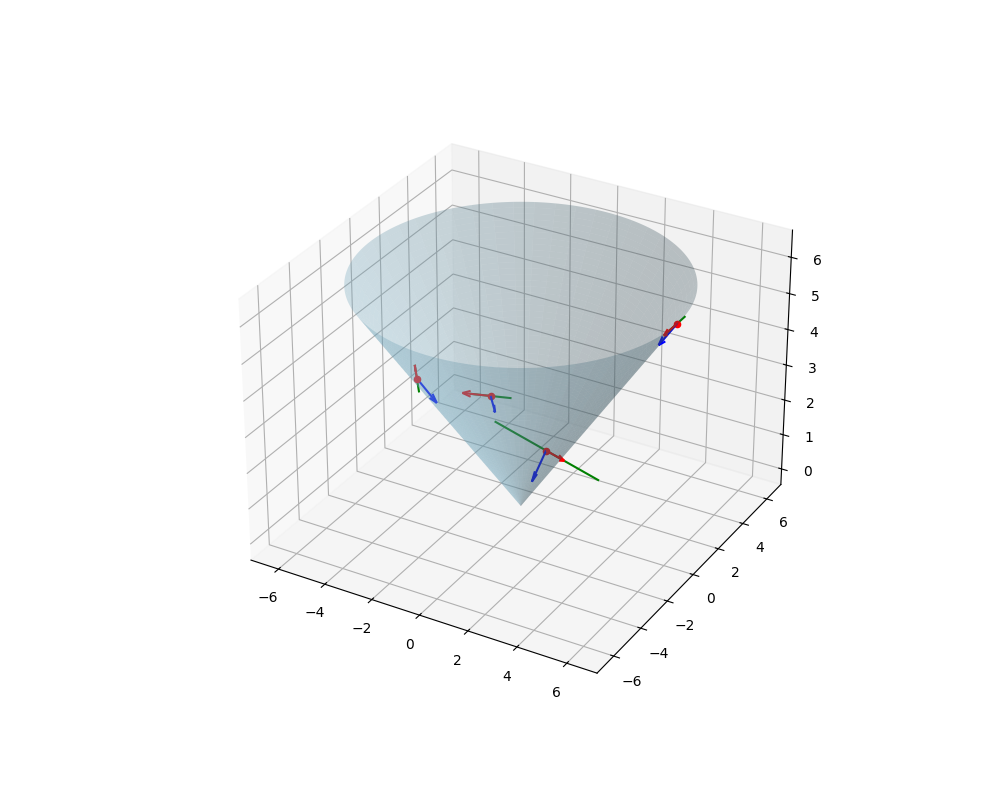

In [67]:
# Number of points for the grid to plot the surface of a conus
n = 1000

# Create a meshgrid of (u, v) pairs
u = np.linspace(0, 2 * np.pi, n)
v = np.linspace(0, 2 * np.pi, n)
u, v = np.meshgrid(u, v)

# Define specific points (u0, v0) to analyze principal curvatures and directions
u0 = np.array([0.4 * np.pi, 1.2 * np.pi, 1.6 * np.pi, 0])
v0 = np.array([0.4 * np.pi, 1.2 * np.pi, 1.6 * np.pi, 2 * np.pi])

# Call the plotting function to visualize the cone and principal curvatures
plotting(conus, u, v, u0, v0)

For a cone, the principal directions are aligned along the radial direction and along the circular direction. The principal curvatures of a cone at any point on its surface are $k_1 = 0$ in the direction of the cone's axis, and $k_2 = \frac{1}{r}$ in the radial direction, where $r$ is the distance from the cone's apex. The Gaussian curvature of a cone is zero everywhere, as one of the principal curvatures is always zero.

## 2) Principal directions of the hyperboloid
### 2.1) At some points  $m_0=f(x_0,y_0)$ calculate the principal curvatures $\lambda_1$ and $\lambda_2$ and principal directions $\vec{e_1}$ and $\vec{e_2}$.
### 2.2) Plot the segments $C_1 = \{m_0 + t \vec{e_1},\ t\in[-\lambda_1,\lambda_1]\}$ and $C_2 = \{m_0 + t \vec{e_2},\ t\in[-\lambda_2,\lambda_2]\}$
### 2.3) What do you observe ?

In [68]:
def hyperboloid(u_0,v_0):
  x = np.cos(u_0) - v_0 * np.sin(u_0)
  y = np.sin(u_0) + v_0 * np.cos(u_0)
  z = v_0
  return np.array([x,y,z])

For point (u0, v0): (0.010, 0.010)
Eigenvalues:  -1.000, 1.000
Eigenvectors:  [0.020, -1.000, 0.000], [-0.010, -0.000, -1.000]
Mean curvature: -0.000
Gaussian curvature: -1.000
--------------------------
For point (u0, v0): (1.000, -6.000)
Eigenvalues:  -0.117, 0.002
Eigenvectors:  [-0.395, -0.919, 0.000], [0.645, -0.277, -0.712]
Mean curvature: -0.058
Gaussian curvature: -0.000
--------------------------
For point (u0, v0): (2.000, 5.000)
Eigenvalues:  -0.140, 0.003
Eigenvectors:  [-0.230, 0.973, 0.000], [0.681, 0.161, -0.714]
Mean curvature: -0.069
Gaussian curvature: -0.000
--------------------------
For point (u0, v0): (0.000, 7.000)
Eigenvalues:  -0.101, 0.001
Eigenvectors:  [0.990, -0.141, 0.000], [-0.099, -0.696, -0.711]
Mean curvature: -0.050
Gaussian curvature: -0.000
--------------------------


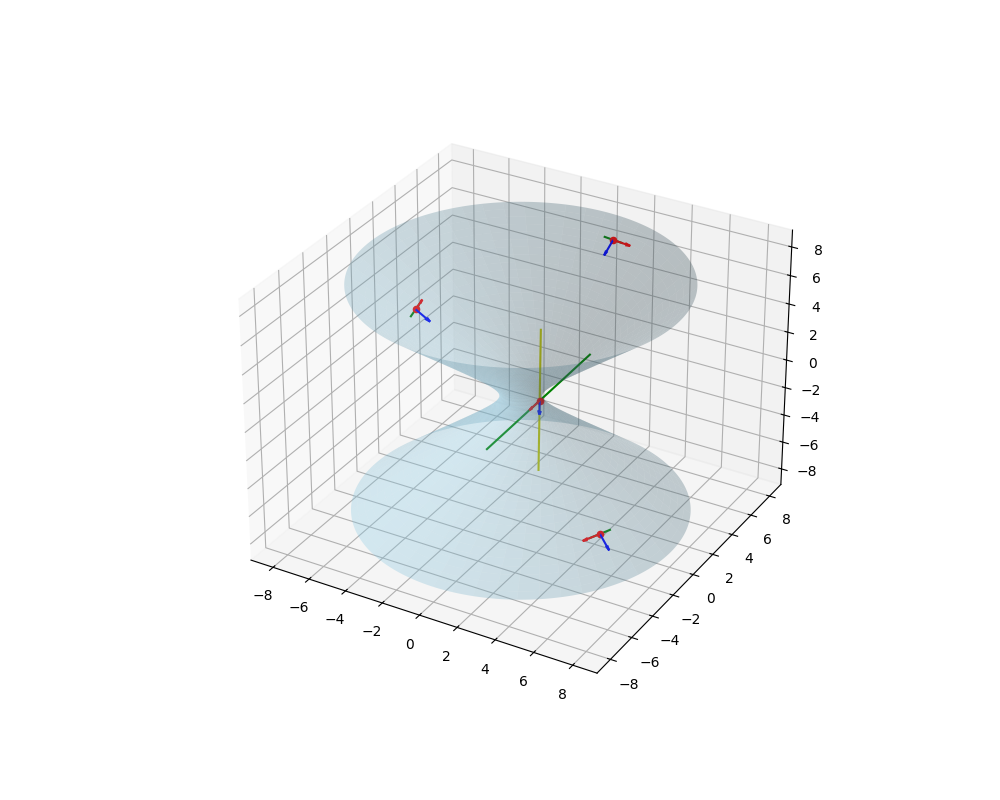

In [69]:
# Number of points for the grid to plot the surface of a hyperboloid
n = 1000

# Create a meshgrid of (u, v) pairs
u = np.linspace(0,2*np.pi,n)
v = np.linspace(-8,8,n)
u,v = np.meshgrid(u,v)

# Define specific points (u0, v0) to analyze principal curvatures and directions
u0 = np.array([0.01,1,2,0])
v0 = np.array([0.01,-6,5,7])

# Call the plotting function to visualize the hyperboloid and principal curvatures
plotting(hyperboloid,u,v,u0,v0)

## 3) Principal directions of the sphere
### 3.1) At some points  $m_0=f(x_0,y_0)$ calculate the principal curvatures $\lambda_1$ and $\lambda_2$ and principal directions $\vec{e_1}$ and $\vec{e_2}$.
### 3.2) Plot the segments $C_1 = \{m_0 + t \vec{e_1},\ t\in[-\lambda_1,\lambda_1]\}$ and $C_2 = \{m_0 + t \vec{e_2},\ t\in[-\lambda_2,\lambda_2]\}$
### 3.3) What do you observe ?

In [70]:
def sphere(u_0,v_0, R = 4):
  x = R * np.sin(u_0) * np.cos(v_0)
  y = R * np.sin(u_0) * np.sin(v_0)
  z = R * np.cos(u_0)
  return np.array([x,y,z])

For point (u0, v0): (0.010, 0.010)
Eigenvalues:  -0.250, -0.250
Eigenvectors:  [0.821, -0.571, -0.008], [0.571, 0.821, -0.006]
Mean curvature: -0.250
Gaussian curvature: 0.062
--------------------------
For point (u0, v0): (1.000, 1.000)
Eigenvalues:  -0.250, -0.250
Eigenvectors:  [-0.779, 0.022, 0.627], [0.432, -0.706, 0.561]
Mean curvature: -0.250
Gaussian curvature: 0.062
--------------------------
For point (u0, v0): (2.000, 2.000)
Eigenvalues:  -0.250, -0.250
Eigenvectors:  [0.371, -0.276, -0.886], [-0.848, -0.490, -0.203]
Mean curvature: -0.250
Gaussian curvature: 0.062
--------------------------
For point (u0, v0): (3.000, 3.000)
Eigenvalues:  -0.250, -0.250
Eigenvectors:  [-0.712, 0.693, 0.114], [0.688, 0.721, -0.083]
Mean curvature: -0.250
Gaussian curvature: 0.062
--------------------------


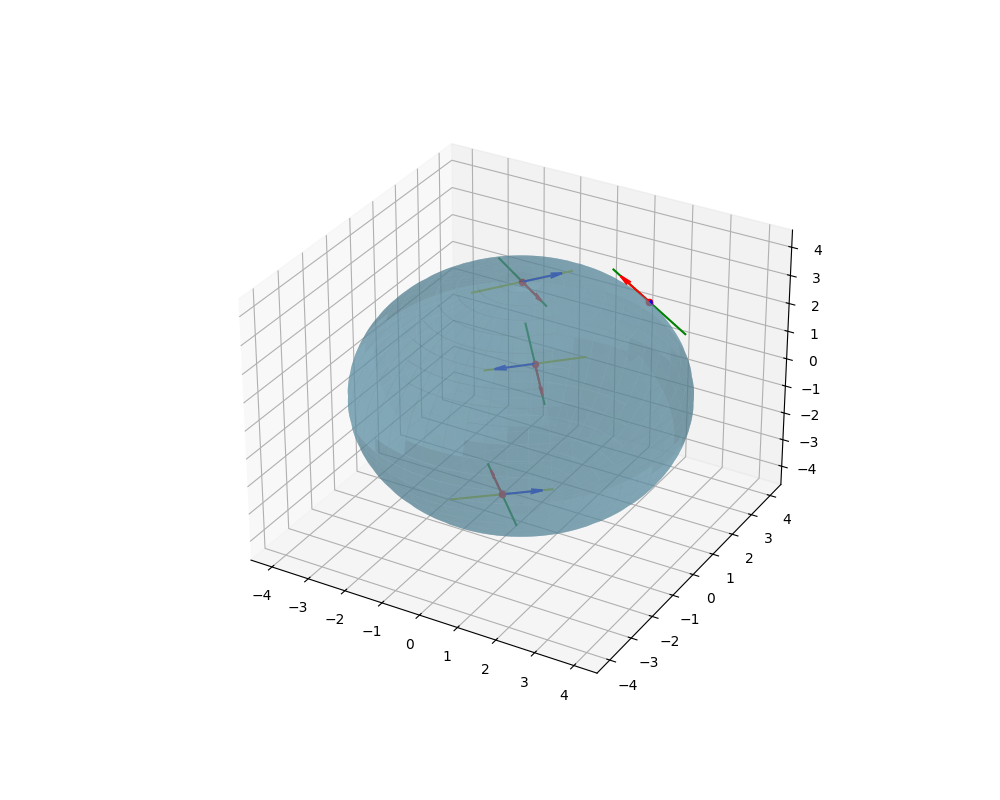

In [71]:
# Number of points for the grid to plot the surface of a sphere
n = 1000

# Create a meshgrid of (u, v) pairs
u = np.linspace(0,2*np.pi,n)
v = np.linspace(0,2*np.pi,n)
u,v = np.meshgrid(u,v)

# Define specific points (u0, v0) to analyze principal curvatures and directions
u0 = np.array([0.01,1,2,3])
v0 = np.array([0.01,1,2,3])

# Call the plotting function to visualize the sphere and principal curvatures
plotting(sphere,u,v,u0,v0)

## 4) Principal directions of the helicoid
### 4.1) At some points  $m_0=f(x_0,y_0)$ calculate the principal curvatures $\lambda_1$ and $\lambda_2$ and principal directions $\vec{e_1}$ and $\vec{e_2}$.
### 4.2) Plot the segments $C_1 = \{m_0 + t \vec{e_1},\ t\in[-\lambda_1,\lambda_1]\}$ and $C_2 = \{m_0 + t \vec{e_2},\ t\in[-\lambda_2,\lambda_2]\}$
### 4.3) What do you observe ?

In [72]:
def helicoid(u_0,v_0, alpha = 1):
  x = u_0 * np.cos(alpha * v_0)
  y = u_0 * np.sin(alpha * v_0)
  z = v_0
  return np.array([x,y,z])

For point (u0, v0): (0.010, 3.000)
Eigenvalues:  -1.000, 1.000
Eigenvectors:  [0.701, -0.093, -0.707], [-0.699, 0.107, -0.707]
Mean curvature: 0.000
Gaussian curvature: -1.000
--------------------------
For point (u0, v0): (1.000, 7.000)
Eigenvalues:  0.500, -0.500
Eigenvectors:  [0.862, 0.088, -0.500], [0.205, 0.842, 0.500]
Mean curvature: -0.000
Gaussian curvature: -0.250
--------------------------
For point (u0, v0): (2.000, 11.000)
Eigenvalues:  0.200, -0.200
Eigenvectors:  [-0.629, -0.710, -0.316], [0.636, -0.704, 0.316]
Mean curvature: -0.000
Gaussian curvature: -0.040
--------------------------
For point (u0, v0): (3.000, 14.000)
Eigenvalues:  0.100, -0.100
Eigenvectors:  [0.761, 0.609, -0.224], [-0.568, 0.792, 0.224]
Mean curvature: -0.000
Gaussian curvature: -0.010
--------------------------


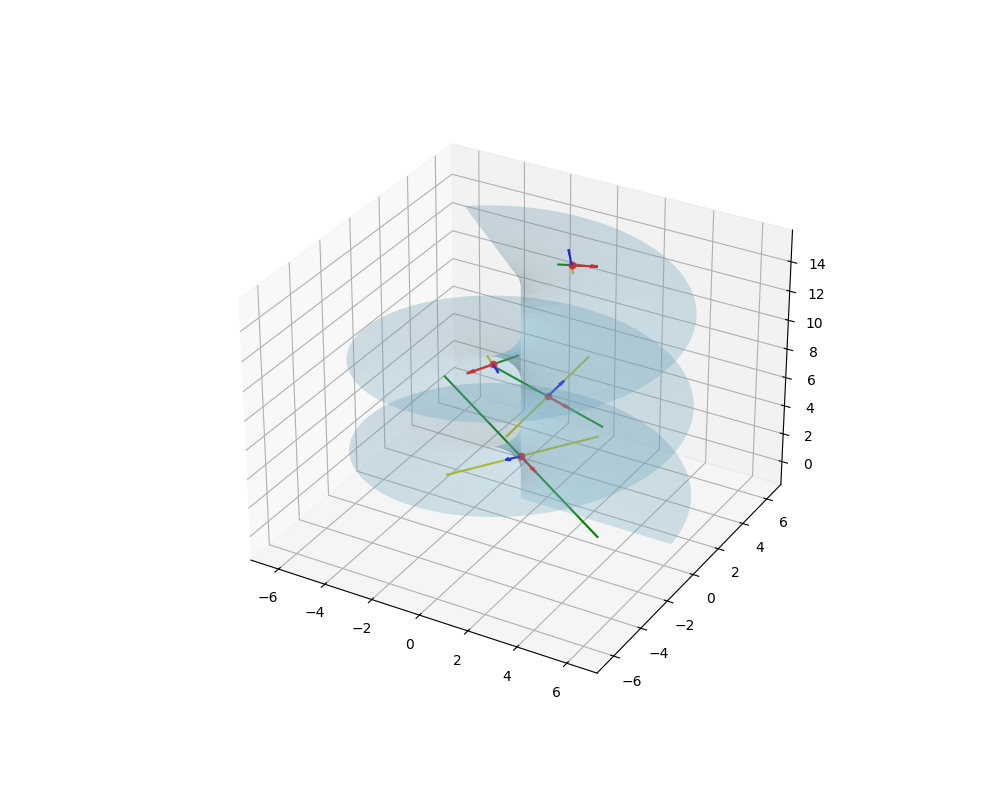

In [73]:
# Number of points for the grid to plot the surface of a helicoid
n = 1000

# Create a meshgrid of (u, v) pairs
R = 15
u = np.linspace(0,2*np.pi,n)
v = np.linspace(0,R,n)
u,v = np.meshgrid(u,v)

# Define specific points (u0, v0) to analyze principal curvatures and directions
u0 = np.array([0.01,1,2,3])
v0 = np.array([3,7,11,14])

# Call the plotting function to visualize the sphere and principal curvatures
plotting(helicoid,u,v,u0,v0)